In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
retails=pd.read_csv('/home/vinod/Downloads/Online Retail.csv',sep=',',encoding='ISO-8859-1',header=0)

In [3]:
retails.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retails['InvoiceDate']=pd.to_datetime(retails['InvoiceDate'])

In [5]:
retails.shape

(541909, 8)

In [6]:
retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
retails.isna().sum()/len(retails)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
order_wise=retails.dropna(how='any',axis=0)

In [9]:
order_wise.isna().sum()/len(order_wise)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

# RFM implementation
Extracting R(Recency), F(Frequency), M(Monetary) columns form the above data



In [10]:
retails['Amount']= retails['Quantity']*retails['UnitPrice']

In [11]:
amount =pd.DataFrame(retails['Amount'])

In [12]:
order_wise=pd.merge(order_wise,amount,how='inner',left_index=True,right_index=True)

In [13]:
amount .head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [14]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
monetary =order_wise.groupby(by='CustomerID',as_index=False)['Amount'].sum()

In [16]:
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Frequency Value

In [17]:
frequency = order_wise.groupby(by='CustomerID',as_index=False)['InvoiceNo'].count()

In [18]:
frequency.columns=['CustomerID','Frequency']

In [19]:
frequency.reset_index(inplace=True,drop=True)

In [20]:
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
master=monetary.merge(frequency,on='CustomerID')

In [22]:
master.head(5)

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [23]:
master.dtypes

CustomerID    float64
Amount        float64
Frequency       int64
dtype: object

In [24]:
maximum =order_wise['InvoiceDate'].max()

In [25]:
maximum

Timestamp('2011-12-10 17:19:00')

# Recency Value

In [26]:
recency  = order_wise.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
recency.columns=['CustomerID','InvoiceDate']

recency['deff']=recency['InvoiceDate'].apply(lambda recency: (maximum-recency).days)

In [27]:
recency.head()

,CustomerID,InvoiceDate,deff
0,12346.0,2011-01-18 10:17:00,326
1,12347.0,2011-10-31 12:25:00,40
2,12348.0,2011-09-25 13:13:00,76
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,311


In [28]:
df= recency.groupby(by='CustomerID',as_index=False)['deff'].min()

In [29]:
df.columns=['CustomerID','deff']

In [30]:
df.head()

,CustomerID,deff
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [31]:
df.dtypes

CustomerID    float64
deff            int64
dtype: object

In [32]:
RFM=master.merge(df,on='CustomerID')

In [33]:
RFM.head()

,CustomerID,Amount,Frequency,deff
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


In [34]:
RFM=pd.DataFrame(RFM)

In [35]:
RFM.head()

,CustomerID,Amount,Frequency,deff
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


# Outlier Treatment

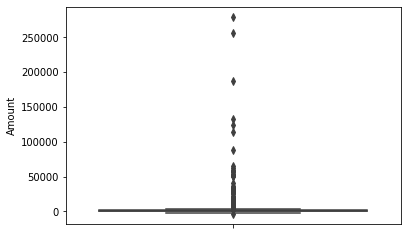

In [36]:
sns.boxplot(y=RFM['Amount'])
Q1=RFM.Amount.quantile(.25)
Q3=RFM.Amount.quantile(.75)
IQR=Q3-Q1
RFM=Q1-1.5*IQR,Q3+1.5*IQR

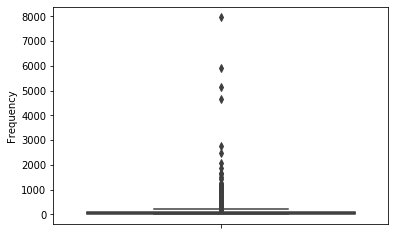

In [37]:
sns.boxplot(y=master['Frequency'])
Q1=master.Frequency.quantile(.25)
Q3=master.Frequency.quantile(.75)
IQR=Q3-Q1
RFM=Q1-1.5*IQR,Q3+1.5*IQR

In [38]:
Rfm_1=master.merge(df)

In [39]:
Rfm_1.head()

,CustomerID,Amount,Frequency,deff
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


In [40]:
Rfm_1.drop(['CustomerID'],axis=1,inplace=True)

In [41]:
Rfm_1.head()

,Amount,Frequency,deff
0,0.00,2,326
1,4310.00,182,40
2,1797.24,31,76
3,1757.55,73,19
4,334.40,17,311


# Scaling the RFM data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
standard_scaler =StandardScaler(copy=True,with_mean=True,with_std=True)

In [44]:
RFM_norm1 = standard_scaler.fit_transform(Rfm_1)

In [45]:
RFM_norm1=pd.DataFrame(RFM_norm1)

In [46]:
RFM_norm1.columns=['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-0.231001,-0.391720,1.975600
1,0.293432,0.382657,-0.535025
2,-0.012316,-0.266959,-0.219002
3,-0.017146,-0.086271,-0.719372
4,-0.190312,-0.327188,1.843924


# Hopkins Statistics:

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
hopkins(RFM_norm1)

0.9936474613878481

# K-Means with some K

In [49]:
from sklearn.cluster import KMeans
model_clus5 =KMeans(n_clusters=5,max_iter=50,random_state=1)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=5, random_state=1)

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
ssc_=[]
for k in range(2, 15):
        kmeans=KMeans(n_clusters=k,max_iter=50,random_state=1)
        kmeans.fit(RFM_norm1)
        ssc_.append(kmeans.inertia_)


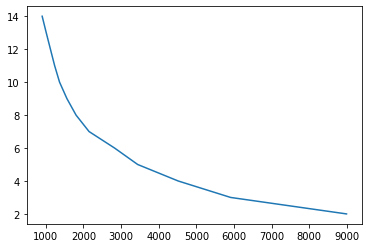

In [52]:
plt.plot(ssc_,range(2,15))

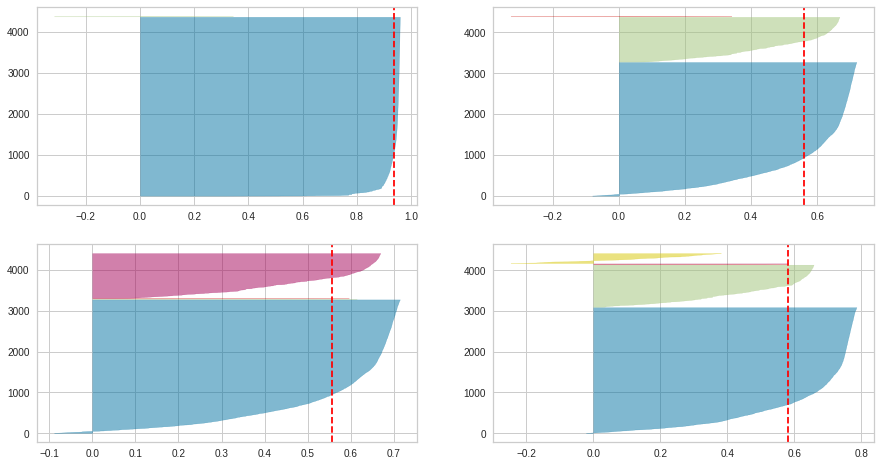

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

#iterate from range 2 to 5
for i in [ 2, 3, 4, 5]:
    km =KMeans(n_clusters=i,max_iter=50,n_init=50,random_state=1)
    q, mod = divmod(i, 2)
    visualizer =SilhouetteVisualizer(estimator=km,ax=ax[q-1][mod], colors='yellowbrick')
    visualizer.fit(RFM_norm1)

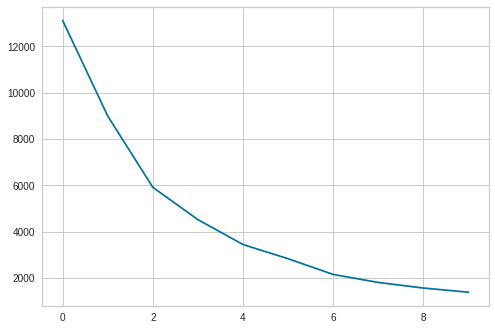

In [54]:
ssd =[]
for num_clusters in list(range(1,11)):
    model_clus =KMeans(n_clusters=num_clusters,max_iter=50,random_state=42)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)

#  Elbow Method

In [55]:
from yellowbrick.cluster import KElbowVisualizer


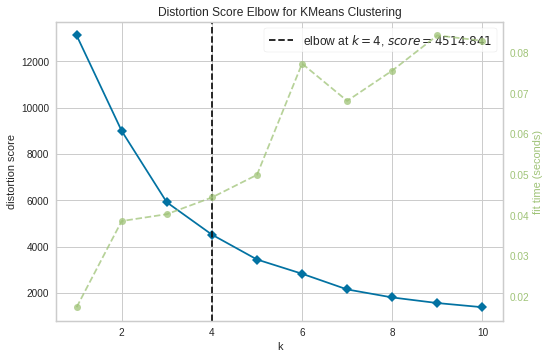

In [56]:
model=KMeans(n_clusters=range(1,11),max_iter=50,random_state=42)
elbow = KElbowVisualizer(model,k=range(1,11))
elbow.fit(RFM_norm1)
elbow.show()

# Heirarchical Clustering

In [57]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [58]:
RFM_Sample=RFM_norm1.sample(n=100,random_state=10)


In [59]:
from sklearn.metrics.pairwise import euclidean_distances


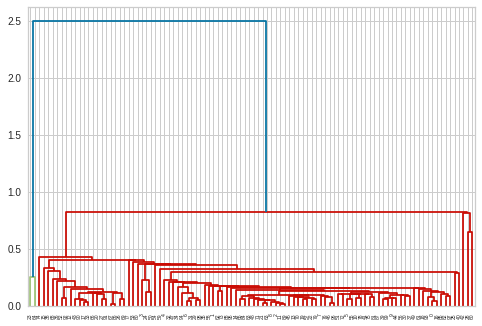

In [60]:
mergings =linkage(RFM_Sample,method='single',metric='euclidean')
fig = figsize=(25, 10)
fig=dendrogram(mergings)


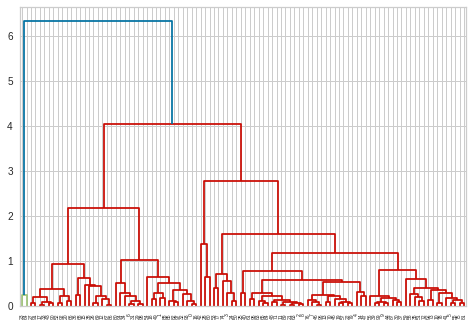

In [61]:
mergings =linkage(RFM_Sample,method='complete',metric='euclidean')
fig = figsize=(25, 10)
fig=dendrogram(mergings)


# Agglomerative Clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
cluster =AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clus=cluster.fit_predict(RFM_norm1)

In [64]:
RFM_norm2 =np.array(RFM_norm1)

In [65]:
RFM_norm2

array([[-0.23100099, -0.3917197 ,  1.97560006],
       [ 0.29343167,  0.38265697, -0.53502522],
       [-0.01231622, -0.26695902, -0.21900246],
       ...,
       [-0.20951263, -0.34439668, -0.06976949],
       [ 0.02390005,  2.85205812, -0.79837752],
       [-0.00744423, -0.0991774 , -0.88616162]])

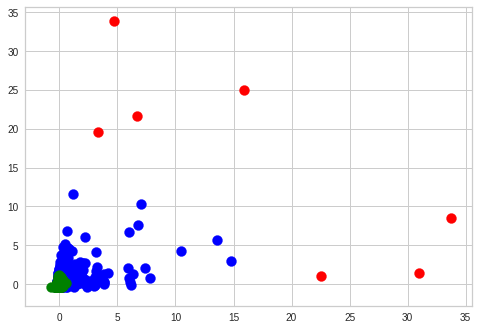

In [66]:
plt.scatter(RFM_norm2[clus==0, 0], RFM_norm2[clus==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(RFM_norm2[clus==1, 0], RFM_norm2[clus==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(RFM_norm2[clus==2, 0], RFM_norm2[clus==2, 1], s=100, c='green', label ='Cluster 3')


In [67]:
from sklearn.metrics import silhouette_score

In [68]:
model=silhouette_score(RFM_norm1,clus)

In [69]:
model

0.4994698973490676

# BIRCH

In [70]:
from sklearn.cluster import Birch

In [71]:
model=Birch(threshold=1.5, branching_factor=30, n_clusters=None)

In [72]:
model.fit(RFM_norm1)

Birch(branching_factor=30, n_clusters=None, threshold=1.5)

In [73]:
pred=model.predict(RFM_norm1)

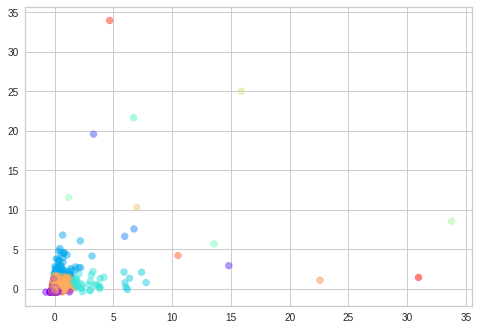

In [74]:
plt.scatter(RFM_norm1.iloc[:,:1],RFM_norm1['Amount'],c=pred,cmap='rainbow',alpha=0.5)

In [75]:
score=silhouette_score(RFM_norm1,pred)

In [76]:
score

0.3889760461797024

# DBSCAN

In [77]:
from sklearn.cluster import DBSCAN

In [78]:
model=DBSCAN(eps=1,min_samples=13).fit(RFM_norm1)

In [79]:
print('The labels are',model.labels_)

The labels are [0 0 0 ... 0 0 0]


In [80]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)

In [81]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [82]:
len(core_samples_mask)

4372

In [83]:
len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

1

In [84]:
pred=model.fit_predict(RFM_norm1)

In [85]:
score=silhouette_score(RFM_norm1,pred)

In [86]:
score

0.878981242587891

# Mini-Batch K-Means clustering

In [87]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [88]:
mbk=MiniBatchKMeans(n_clusters=8,init='k-means++',random_state=1)
mbk.fit(RFM_norm1)

MiniBatchKMeans(random_state=1)

In [89]:
mbk.cluster_centers_

array([[-0.10801355, -0.1469029 , -0.70277951],
       [-0.16856069, -0.24478438,  0.8717906 ],
       [ 2.11160781,  2.6677207 , -0.71639638],
       [-0.16344213, -0.27322125, -0.37917366],
       [-0.13351171, -0.22015076,  0.16905401],
       [-0.19221376, -0.30096444,  2.3272649 ],
       [ 0.19219135,  0.19213572, -0.57120574],
       [ 0.18504048,  0.82572587, -0.6551237 ]])

In [90]:
pred=mbk.predict(RFM_norm1)

In [91]:
score=silhouette_score(RFM_norm1,pred)

In [92]:
score

0.31996165413627686

# Mean Shift Clustering Method

In [93]:
from sklearn.cluster import MeanShift

In [94]:
ms=MeanShift()

In [95]:
ms.fit(RFM_norm2)

MeanShift()

In [96]:
cluster_centers = ms.cluster_centers_

In [97]:
cluster_centers

array([[-0.0906286 , -0.11562958, -0.45453151],
       [-0.20507931, -0.31007999,  4.95964702],
       [-0.20201346, -0.30830108,  3.39063693],
       [ 0.54764204,  4.07153591, -0.74030496],
       [ 3.43797048,  0.37512831, -0.77204229],
       [ 3.49808606,  1.54766364, -0.81769002],
       [ 6.15089147,  0.57840218, -0.71278802],
       [ 6.13545509,  1.75072241, -0.81593434],
       [33.77669478,  8.56953919, -0.8686048 ],
       [30.97194985,  1.46248221, -0.7808207 ],
       [22.58147515,  1.10971062, -0.85982639],
       [15.90018488, 24.99492874, -0.88616162],
       [14.82367795,  2.94670416, -0.66670137],
       [13.56536689,  5.70864761, -0.88616162],
       [10.49192871,  4.22872775, -0.83349116],
       [ 7.78662278,  0.80856413, -0.7808207 ],
       [ 7.39250982,  2.11640029, -0.65792296],
       [ 6.99903201, 10.31618878, -0.88616162],
       [ 6.75160444,  7.58866207, -0.83349116],
       [ 6.71936339, 21.66080697, -0.7808207 ],
       [ 5.95784459,  6.65510798, -0.420

# OPTICS

In [98]:
from sklearn.cluster import OPTICS

In [99]:
op=OPTICS()
op.fit(RFM_norm2)
op.labels_

array([ -1,  -1,  -1, ...,  48, 182,  -1])

In [100]:
len(set(op.labels_)) - (1 if -1 in op.labels_ else 0)

195

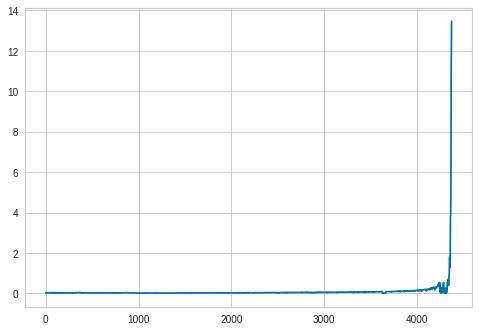

In [101]:
reachability =op.reachability_[op.ordering_]
plt.plot(reachability)